# Pokemon

### Introduction:

This time you will create the data.



### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql import types as T


spark = SparkSession.builder\
                    .appName('pokemon')\
                    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/07/09 18:38:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/07/09 18:38:23 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


### Step 2. Create a data dictionary that looks like the DataFrame below

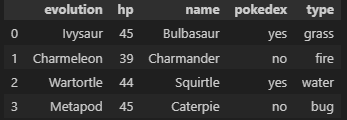

In [13]:

evolution = ['ivysaur', 'charmeleon', 'wartotle', 'Metapod']
hp = [45,  39, 44, 45]
name = ['bulbasaur', 'charmander', 'squirtle', 'caterpie']
pokedex = ['yes', 'no', 'yes', 'no']
type = ['grass', 'fire', 'water', 'bug']


data = list(zip(map(str.title, evolution), hp, map(str.title, name), pokedex, map(str.lower, type)))
schema = ['evolution', 'hp', 'name','pokedex', 'type']
data



[('Ivysaur', 45, 'Bulbasaur', 'yes', 'grass'),
 ('Charmeleon', 39, 'Charmander', 'no', 'fire'),
 ('Wartotle', 44, 'Squirtle', 'yes', 'water'),
 ('Metapod', 45, 'Caterpie', 'no', 'bug')]

### Step 3. Assign it to a variable called pokemon

In [42]:
pokemon = spark.createDataFrame(data, schema=schema)
pokemon.show(5)

+----------+---+----------+-------+-----+
| evolution| hp|      name|pokedex| type|
+----------+---+----------+-------+-----+
|   Ivysaur| 45| Bulbasaur|    yes|grass|
|Charmeleon| 39|Charmander|     no| fire|
|  Wartotle| 44|  Squirtle|    yes|water|
|   Metapod| 45|  Caterpie|     no|  bug|
+----------+---+----------+-------+-----+



In [41]:
df = pd.DataFrame(data, columns=schema)

df.head()

,evolution,hp,name,pokedex,type
0,Ivysaur,45,Bulbasaur,yes,grass
1,Charmeleon,39,Charmander,no,fire
2,Wartotle,44,Squirtle,yes,water
3,Metapod,45,Caterpie,no,bug


### Step 4. Ops...it seems the DataFrame columns are in alphabetical order. Place  the order of the columns as name, type, hp, evolution, pokedex

In [43]:
pokemon = pokemon.select('name', 'type', 'hp', 'evolution', 'pokedex')
pokemon.show(5)

+----------+-----+---+----------+-------+
|      name| type| hp| evolution|pokedex|
+----------+-----+---+----------+-------+
| Bulbasaur|grass| 45|   Ivysaur|    yes|
|Charmander| fire| 39|Charmeleon|     no|
|  Squirtle|water| 44|  Wartotle|    yes|
|  Caterpie|  bug| 45|   Metapod|     no|
+----------+-----+---+----------+-------+



In [44]:
df = df.loc[:, ['name', 'type', 'hp', 'evolution', 'pokedex']].copy()

df.head()

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartotle,yes
3,Caterpie,bug,45,Metapod,no


### Step 5. Add another column called place, and insert what you have in mind.

In [49]:
places = ['yerba!', 'fuego!', 'agua!', 'tierra!']

new_data = [row + (region,) for row, region in zip(data, places)]
new_columns = pokemon.columns + ["place"]

pokemon = spark.createDataFrame(new_data, new_columns)
pokemon.show()

+----------+----+----------+---------+-------+-------+
|      name|type|        hp|evolution|pokedex|  place|
+----------+----+----------+---------+-------+-------+
|   Ivysaur|  45| Bulbasaur|      yes|  grass| yerba!|
|Charmeleon|  39|Charmander|       no|   fire| fuego!|
|  Wartotle|  44|  Squirtle|      yes|  water|  agua!|
|   Metapod|  45|  Caterpie|       no|    bug|tierra!|
+----------+----+----------+---------+-------+-------+



In [50]:
df['place'] = places

In [51]:
df

,name,type,hp,evolution,pokedex,place
0,Bulbasaur,grass,45,Ivysaur,yes,yerba!
1,Charmander,fire,39,Charmeleon,no,fuego!
2,Squirtle,water,44,Wartotle,yes,agua!
3,Caterpie,bug,45,Metapod,no,tierra!


### Step 6. Present the type of each column

In [53]:
pokemon.printSchema()

root
 |-- name: string (nullable = true)
 |-- type: long (nullable = true)
 |-- hp: string (nullable = true)
 |-- evolution: string (nullable = true)
 |-- pokedex: string (nullable = true)
 |-- place: string (nullable = true)
 |-- id: long (nullable = false)



In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       4 non-null      object
 1   type       4 non-null      object
 2   hp         4 non-null      int64 
 3   evolution  4 non-null      object
 4   pokedex    4 non-null      object
 5   place      4 non-null      object
dtypes: int64(1), object(5)
memory usage: 320.0+ bytes


### BONUS: Create your own question and answer it.

In [56]:
spark.stop()